# 基于 pyqcat-monster 的腔调制谱粗测


在本教程中，我们将演示如何使用 pyqcat-monster 进行腔频粗测。在这里你可以了解到：

- 单根BUS上大范围扫腔的测试方法；
- 腔调制谱的测试方法；

在此基础上，我们还提供了 [monster]() 的 API 文档，期待您的阅读。当您发现有错误或者需要优化的地方，欢迎您通过 [pyqcat社区]() 向我们反馈，您的意见是我们不断进步的动力！

## 创建实验环境

- 若您未安装 pyqcat 包（monster），通过本地源码测试，需要执行下面操作，将 monster 项目环境加载到 jupyter 中；
- 若安装了 pyqcat 包（monster），跳过此步骤

In [1]:
import os
import sys


# package_root = "../../pyqcat-monster"

# print(os.path.abspath(package_root))

# sys.path.insert(0, package_root)
sys.executable

'D:\\anaconda3\\envs\\pyqcat_monster\\python.exe'

In [1]:
import pandas as pd
import numpy as np
import matplotlib

from pyQCat.tools import qarange
from pyQCat.context import ExperimentContext
from pyQCat.invoker import Invoker
from pyQCat.parameters import get_parameters


%matplotlib notebook
pd.set_option('max_colwidth', None)

conf_file = r'F:\MonsterTest_QT8013\conf\config.conf'

username = "wangpeng"
password = "8013"


# Invoker.verify_account(username=username, password=password)
Invoker.load_account()

{'code': 200,
 'data': {'username': 'wangpeng',
  'groups': 'normal',
  'email': 'pwang0110@mail.ustc.edu.cn',
  'phone_num': None,
  'is_super': False,
  'is_admin': False,
  'status': 0,
  'create_time': '2022-11-11 16:58:11',
  'last_login_time': '2022-12-12 16:30:11',
  'id': '636e0ea3eac949e7d31db591'},
 'msg': 'success'}

In [2]:
context = ExperimentContext(conf_file)

2022-12-20 20:32:54 |   INFO   | Monster Log save in E:\Data\D121107\monster-2022-12-20.log
2022-12-20 20:32:54 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |              sweet point               |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|



## FindBusCavityFreq

BUS扫腔实验，该实验一般为测控实验的第一步，您可以使用矢量网络分析仪进行进行大范围的扫腔，旨在获取当前BUS上所有腔频的大致位置

In [5]:
from pyQCat.preliminary import FindBusCavityFreq


fbcf = FindBusCavityFreq.from_experiment_context(context)

fbcf.set_experiment_options(
    network_analyzer='E5071C',
    freq_list=np.linspace(6950, 7250, 1001).tolist(),
    net_power=-40,
    net_IFBW=200,
#     bus=1,
#     simulator_data_path='../scripts/simulator/data/FindBusCavityFreq/'
)

fbcf.run()

2022-11-14 16:26:59 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#\FindBusCavityFreq\BUS0\2022-11-14\16.26.59\


  0%|          | 0/1 [00:00<?, ?it/s]

2022-11-14 16:27:05 |  RESULT  | Experiment results as follow:
|  name   | describe |                      value                       | unit | quality | 
------------------------------------------------------------------------------------------
| fc_list | fc_list  | [6993.2, 7030.1, 7081.7, 7139.0, 7175.3, 7232.0] | MHz  |  None   | 


In [59]:
pd.DataFrame(fbcf.analysis.show_results())

,name,value,unit,extra,quality
0,fc_list,"[6834.25, 6900.5, 6961.75, 6989.0, 7025.75]",MHz,{},None


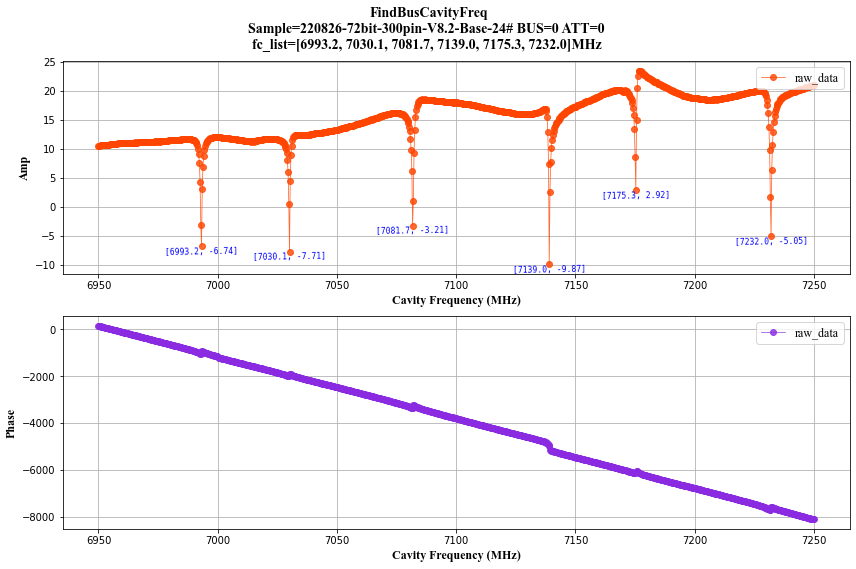

In [6]:
fbcf.analysis.drawer.figure

In [61]:
pd.DataFrame(fbcf.options_table())

,type,name,value
0,experiment option,show_result,True
1,experiment option,simulator_shape,None
2,experiment option,simulator_data_path,None
3,experiment option,freq_list,"[6800.0, 6800.25, 6800.5, 6800.75, 6801.0, 6801.25, 6801.5, 6801.75, 6802.0, 6802.25, 6802.5, 6802.75, 6803.0, 6803.25, 6803.5, 6803.75, 6804.0, 6804.25, 6804.5, 6804.75, 6805.0, 6805.25, 6805.5, 6805.75, 6806.0, 6806.25, 6806.5, 6806.75, 6807.0, 6807.25, 6807.5, 6807.75, 6808.0, 6808.25, 6808.5, 6808.75, 6809.0, 6809.25, 6809.5, 6809.75, 6810.0, 6810.25, 6810.5, 6810.75, 6811.0, 6811.25, 6811.5, 6811.75, 6812.0, 6812.25, 6812.5, 6812.75, 6813.0, 6813.25, 6813.5, 6813.75, 6814.0, 6814.25, 6814.5, 6814.75, 6815.0, 6815.25, 6815.5, 6815.75, 6816.0, 6816.25, 6816.5, 6816.75, 6817.0, 6817.25, 6817.5, 6817.75, 6818.0, 6818.25, 6818.5, 6818.75, 6819.0, 6819.25, 6819.5, 6819.75, 6820.0, 6820.25, 6820.5, 6820.75, 6821.0, 6821.25, 6821.5, 6821.75, 6822.0, 6822.25, 6822.5, 6822.75, 6823.0, 6823.25, 6823.5, 6823.75, 6824.0, 6824.25, 6824.5, 6824.75, ...]"
4,experiment option,network_analyzer,E5071C
5,experiment option,net_power,-40
6,experiment option,bus,1
7,experiment option,ATT,0
8,experiment option,net_IFBW,200
9,analysis option,is_plot,True


In [6]:
qubit_num = [67,68,69,70,71,72]
coupler_num = [6768,6869,6970,7071,7172]

In [7]:
qubit_list = {}
for num in qubit_num:
    qubit_list[num] = get_parameters("qubit", f"q{num}")
coupler_list = {}
for num in coupler_num:
    coupler_list[num] = get_parameters("coupler", f"c{num}")   

In [15]:
for num in qubit_num:
    qubit_list[num].probe_power = -40
    qubit_list[num].save_data()

2022-11-11 17:22:15 |  UPDATE  | Save q67 to data service success.
2022-11-11 17:22:15 |  UPDATE  | Save q68 to data service success.
2022-11-11 17:22:15 |  UPDATE  | Save q69 to data service success.
2022-11-11 17:22:15 |  UPDATE  | Save q70 to data service success.
2022-11-11 17:22:15 |  UPDATE  | Save q71 to data service success.
2022-11-11 17:22:15 |  UPDATE  | Save q72 to data service success.


In [14]:
get_

-40

In [62]:



q0 = get_parameters("qubit", 0)
q3 = get_parameters("qubit", "q3")
q6 = get_parameters("qubit", "q6")
# q4 = get_parameters("qubit", "q4")
# q5 = get_parameters("qubit", "q5")

q0.probe_freq = 6900
q0.probe_power = -40
q0.save_data()

q3.probe_freq = 6900
q3.probe_power = -40
q3.save_data()

q6.probe_freq = 6900
q6.probe_power = -40
q6.save_data()

# q4.probe_freq = 6500
# q4.probe_power = -35
# q4.save_data()

# q5.probe_freq = 6500
# q5.probe_power = -35
# q5.save_data()

2022-11-11 15:36:32 |  UPDATE  | Save q0 to data service success.
2022-11-11 15:36:32 |  UPDATE  | Save q3 to data service success.
2022-11-11 15:36:32 |  UPDATE  | Save q6 to data service success.


## CavityScanFlux

在当前BUS上可以寻找出指定腔频时，我们可以执行 **CavityScanFlux** 实验，它可以完成：

- 判断某个腔是否可以被 DC 调动；
- 确定比特粗测下的腔频位置；
- 寻找某个正常腔的简并点电压；

### Qubit 调制谱粗扫，查看某个比特腔谱的大致位置

2022-11-11 15:44:27 |   EXP    | Result path (local): E:\Data\D1\20221110-7bit\7Bit-STARMONV2.1-2#-B2-0.15\CavityFluxScan\q6-Channel3\2022-11-11\15.44.27\


<IPython.core.display.Javascript object>


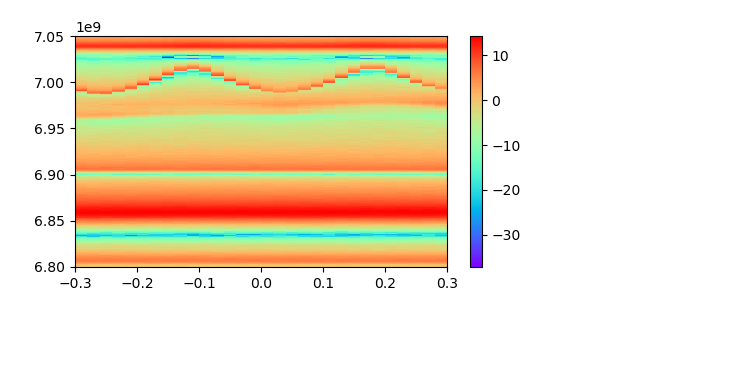

  0%|          | 0/31 [00:00<?, ?it/s]

2022-11-11 15:46:10 |  RESULT  | Experiment results as follow:
| name | describe | value | unit | quality | 
--------------------------------------------


In [65]:
from pyQCat.preliminary import CavityFluxScan

context.configure_qubits('q6')


cfs = CavityFluxScan.from_experiment_context(context)

cfs.set_experiment_options(
    network_analyzer='E5071C',
    net_IFBW=200,
    net_power=-40,
    dc_source='qaio',
    dc_channel=context.qubit.z_dc_channel,
    dc_list=qarange(-0.3, 0.3, 0.02),
    freq_list=np.linspace(6800, 7050, 501).tolist(),
    dynamic_plot=True,
    fine_scan=False,
    scan_name="ac",
#     simulator_data_path='../scripts/simulator/data/CavityFluxScan/dc_qubit_rough/',
)

cfs.set_analysis_options(
    tackle_type='rough'
)

cfs.run()

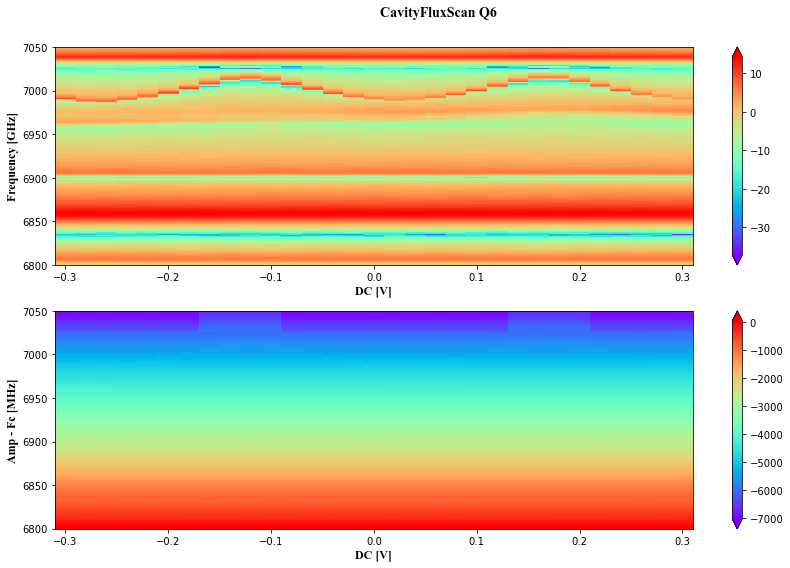

In [66]:
cfs.analysis.drawer.figure

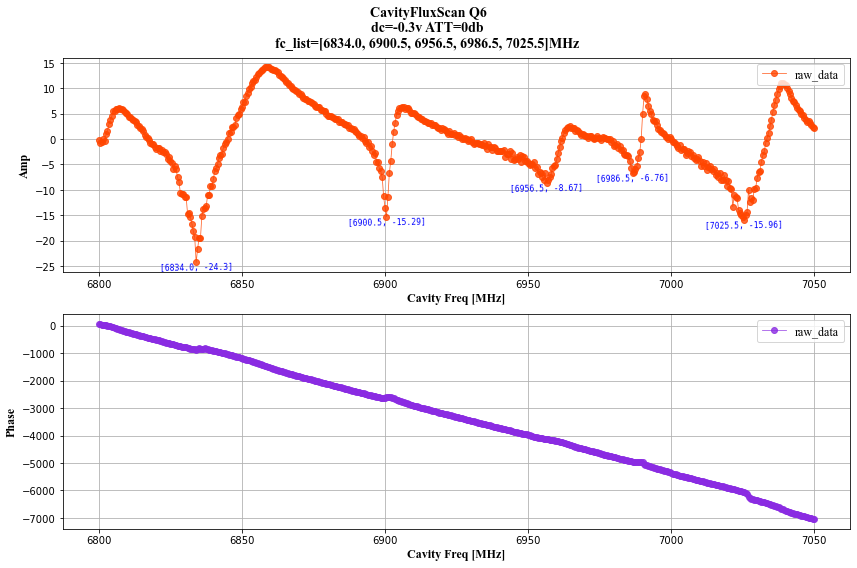

In [67]:
cfs.sub_analysis_list[0].drawer.figure

In [68]:
pd.DataFrame(cfs.sub_analysis_list[30].show_results())

,name,value,unit,extra,quality
0,fc_list,"[6834.5, 6900.5, 6964.0, 6988.0, 7025.5]",MHz,{},None


In [3]:
from pyQCat.preliminary import CavityFluxScan

In [18]:
qubit_list[67].probe_freq + np.linspace(-4, 4, 501)

array([7191.   , 7191.016, 7191.032, 7191.048, 7191.064, 7191.08 ,
       7191.096, 7191.112, 7191.128, 7191.144, 7191.16 , 7191.176,
       7191.192, 7191.208, 7191.224, 7191.24 , 7191.256, 7191.272,
       7191.288, 7191.304, 7191.32 , 7191.336, 7191.352, 7191.368,
       7191.384, 7191.4  , 7191.416, 7191.432, 7191.448, 7191.464,
       7191.48 , 7191.496, 7191.512, 7191.528, 7191.544, 7191.56 ,
       7191.576, 7191.592, 7191.608, 7191.624, 7191.64 , 7191.656,
       7191.672, 7191.688, 7191.704, 7191.72 , 7191.736, 7191.752,
       7191.768, 7191.784, 7191.8  , 7191.816, 7191.832, 7191.848,
       7191.864, 7191.88 , 7191.896, 7191.912, 7191.928, 7191.944,
       7191.96 , 7191.976, 7191.992, 7192.008, 7192.024, 7192.04 ,
       7192.056, 7192.072, 7192.088, 7192.104, 7192.12 , 7192.136,
       7192.152, 7192.168, 7192.184, 7192.2  , 7192.216, 7192.232,
       7192.248, 7192.264, 7192.28 , 7192.296, 7192.312, 7192.328,
       7192.344, 7192.36 , 7192.376, 7192.392, 7192.408, 7192.

### Qubit调制谱细扫

In [53]:
environment_elements = ["q65",  "q72", "c6566", "c6066", "c6672"]

In [8]:
qubit_env = get_parameters('qubit',66)
qubit_env.ac = qubit_env.dc_max
qubit_env.save_data()

2022-11-16 10:52:50 |  UPDATE  | Save q66 to data service success.


In [34]:
coupler_env = get_parameters('coupler',6672)
coupler_env.ac = coupler_env.dc_max
coupler_env.save_data()

2022-11-14 17:09:38 |  UPDATE  | Save c6672 to data service success.


In [ ]:
qubit

In [3]:
from pyQCat.preliminary import CavityFluxScan

In [14]:
context.clear_experiment_params()
context.configure_qubits('q69')
context.maximize_compensate()
# context.configure_environment(environment_elements)
# context._working_dc = {
#     '10': 0.348
# }
qubit = context.qubit
exp = CavityFluxScan.from_experiment_context(context)

exp.set_experiment_options(
    network_analyzer='E5071C',
    net_IFBW=500,
    net_power=-40,
    dc_source='qaio',
    dc_channel=context.qubit.z_flux_channel,
    dc_list=qarange(-0.3, 0.3, 0.01),
    freq_list=(qubit.probe_freq + np.linspace(-4, 4, 301)).tolist(),
    dynamic_plot=False,
    fine_scan=True,
    scan_name="ac",
#     simulator_data_path = '../scripts/simulator/data/CavityFluxScan/dc_qubit_fine/'
)

exp.set_analysis_options(
    tackle_type='Qubit',
    fit_q=True
)

exp.run()

2022-12-21 14:17:51 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CavityFluxScan\q69-Channel22\2022-12-21\14.17.51\


  0%|          | 0/61 [00:00<?, ?it/s]

2022-12-21 14:20:37 |  RESULT  | Experiment results as follow:
|  name   | describe |  value   | unit |      quality       | 
-------------------------------------------------------------
| dc_min  |  dc_min  |  0.117   |  v   | R²=0.9935(perfect) | 
| dc_max  |  dc_max  |  -0.027  |  v   | R²=0.9935(perfect) | 
| fc_min  |  fc_min  | 7140.353 | MHz  | R²=0.9935(perfect) | 
| fc_max  |  fc_max  | 7141.853 | MHz  | R²=0.9935(perfect) | 
| tunable | tunable  |   True   | None | R²=0.9935(perfect) | 


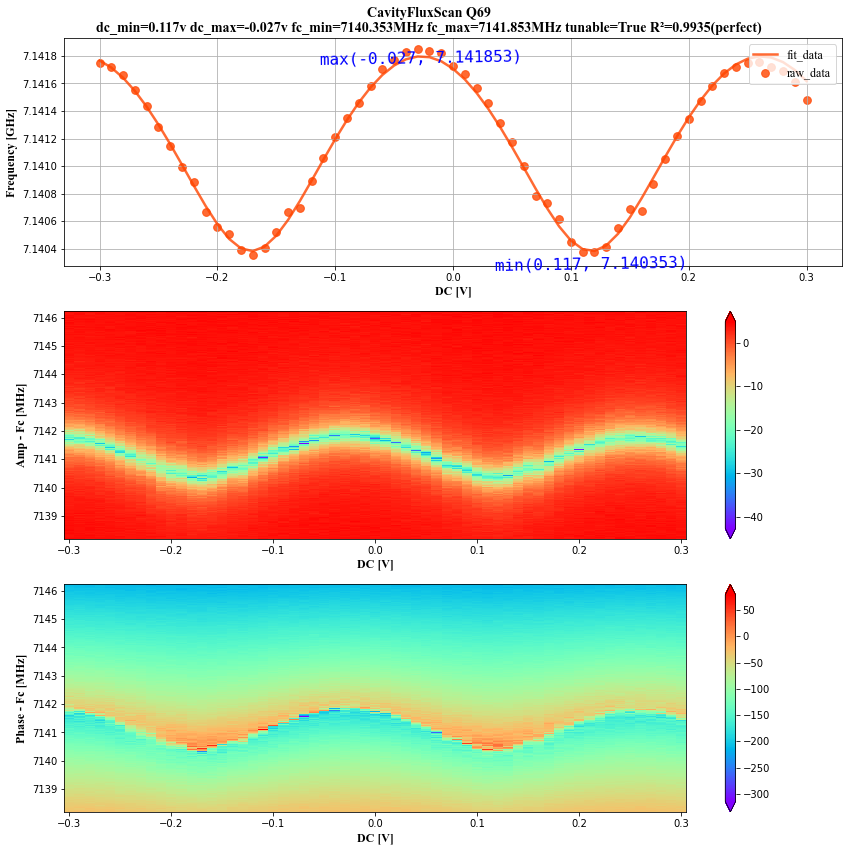

In [15]:
exp.analysis.drawer.figure

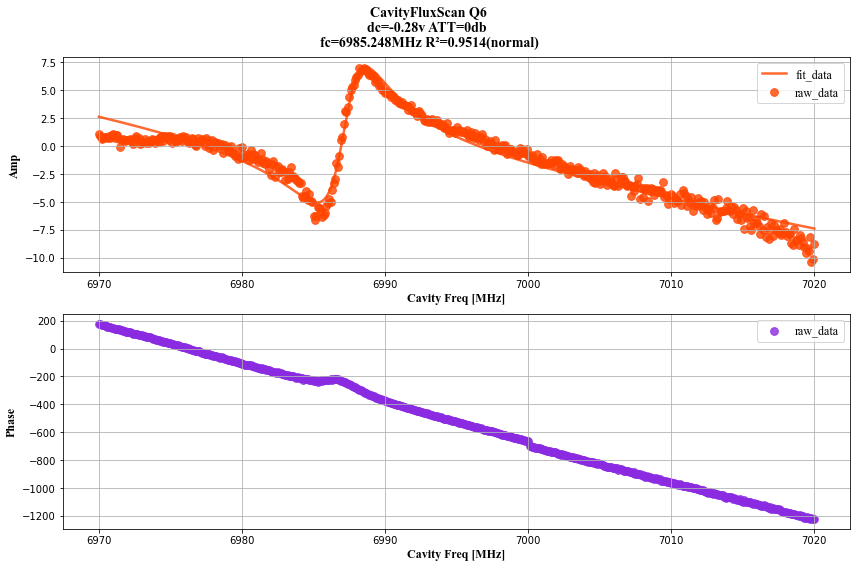

In [75]:
exp.sub_analysis_list[2].drawer.figure

In [38]:
context.clear_experiment_params()
context.configure_qubits('q62')
context.maximize_compensate()
# context.configure_environment(environment_elements)
# context._working_dc = working_dc
qubit = context.qubit
exp = CavityFluxScan.from_experiment_context(context)

exp.set_experiment_options(
    network_analyzer='E5071C',
    net_IFBW=500,
    net_power=-40,
    dc_source='qaio',
    dc_channel=33,
    dc_list=qarange(-0.3, 0.3, 0.01),
    freq_list=(qubit.probe_freq + np.linspace(-5, 5, 201)).tolist(),
    dynamic_plot=False,
    fine_scan=True,
    scan_name="ac",
#     simulator_data_path = '../scripts/simulator/data/CavityFluxScan/dc_qubit_fine/'
)

exp.set_analysis_options(
    tackle_type='Qubit',
    fit_q=False
)

exp.run()

2022-12-14 17:27:34 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CavityFluxScan\q62-Channel33\2022-12-14\17.27.34\


  0%|          | 0/61 [00:00<?, ?it/s]

2022-12-14 17:28:30 |  RESULT  | Experiment results as follow:
|  name   | describe |  value   | unit |    quality    | 
--------------------------------------------------------
| dc_min  |  dc_min  |  0.043   |  v   | R²=0.233(bad) | 
| dc_max  |  dc_max  |  -0.11   |  v   | R²=0.233(bad) | 
| fc_min  |  fc_min  | 7231.817 | MHz  | R²=0.233(bad) | 
| fc_max  |  fc_max  | 7231.841 | MHz  | R²=0.233(bad) | 
| tunable | tunable  |  False   | None | R²=0.233(bad) | 


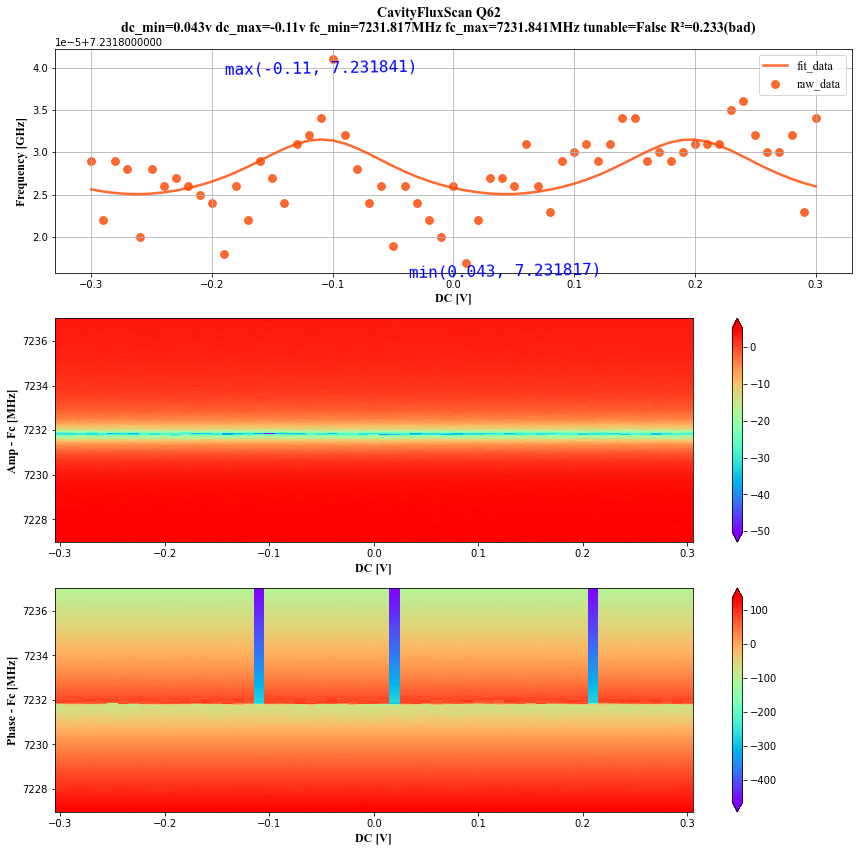

In [39]:
exp.analysis.drawer.figure

In [16]:
qubit.dc_max = exp.analysis.results.dc_max.value
qubit.dc_min = exp.analysis.results.dc_min.value
qubit.tunable = exp.analysis.results.tunable.value
qubit.save_data()

2022-12-21 14:20:49 |  UPDATE  | Save q69 to data service success.


In [60]:
context.clear_experiment_params()
context.configure_couplers('c6768')
coupler = context.coupler

In [4]:
for i in range(30,50):
    print(i/75)

0.4
0.41333333333333333
0.4266666666666667
0.44
0.4533333333333333
0.4666666666666667
0.48
0.49333333333333335
0.5066666666666667
0.52
0.5333333333333333
0.5466666666666666
0.56
0.5733333333333334
0.5866666666666667
0.6
0.6133333333333333
0.6266666666666667
0.64
0.6533333333333333


### 耦合器调制谱细扫

In [24]:
context.clear_experiment_params()
context.configure_couplers('c6470')
context.maximize_compensate()
# context.configure_environment(environment_elements)

In [14]:
pd.DataFrame(context.work_ac_table())

""


In [38]:
qubit = get_parameters('qubit',66)
qubit.z_dc_channel=9
qubit.save_data()

2022-11-16 11:21:49 |  UPDATE  | Save q66 to data service success.


In [44]:
context.clear_experiment_params()
context.configure_couplers('c6566')
context.maximize_compensate()
context.configure_environment(environment_elements)

In [45]:
pd.DataFrame(context.work_dc_table())

,qubit,z_dc_channel,value
0,Coupler(bit=6566),9,0.0v


In [46]:
pd.DataFrame(context.work_ac_table())

,qubit,z_flux_channel,value,m_pulse_model,m_pulse_params,compensate
0,Qubit(bit=66),10,0.348v,FlatTopGaussian,"Options(amp=0.0, sigma=1.25, buffer=5)",PulseCorrectionQ66
1,"Coupler(bit=6566, driveQ65, probeQ66)",11,-0.107v,FlatTopGaussian,"Options(amp=0.0, sigma=1.25, buffer=5)",PulseCorrectionC6566


In [4]:
work_channel = [14, 9, 22, 21, 18, 13, 23, 16, 24, 20]
work_ac = [0.09, 0.081, 0.118,-0.063, 0.09, 0.101, -0.135, -0.124, 0.099,  0.09]
working_dc = {}
for i, channel in enumerate(work_channel):
    working_dc[f'{channel}'] = work_ac[i]




In [15]:
get_parameters('coupler',7071).probe_bit

In [41]:
context.clear_experiment_params()
context.configure_couplers('c6869')
context.maximize_compensate()
coupler = context.coupler
# context._working_dc = working_dc

# coupler.probe_freq = get_parameters("qubit", coupler.probe_bit).probe_freq
# coupler.probe_power = get_parameters("qubit", coupler.probe_bit).probe_power
# coupler.save_data()
exp = CavityFluxScan.from_experiment_context(context)

exp.set_experiment_options(
    network_analyzer='E5071C',
    net_IFBW=500,
    net_power=-40,
    dc_source='qaio',
    dc_channel=context.coupler.z_flux_channel,
    dc_list=qarange(-0.3, 0.3, 0.01),
#     freq_list=(7002.388 + np.linspace(-2, 2, 201)).tolist(),
    freq_list=(get_parameters('qubit',coupler.probe_bit).probe_freq + np.linspace(-2, 2, 201)).tolist(),
    dynamic_plot=False,
    fine_scan=True,
    scan_name="ac",
#     simulator_data_path='../scripts/simulator/data/CavityFluxScan/dc_coupler_fine',
)

exp.set_analysis_options(
    tackle_type='Qubit',
    fit_q=False
)

exp.run()

2022-12-12 17:36:00 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CavityFluxScan\c6869-Channel32\2022-12-12\17.36.00\


  0%|          | 0/61 [00:00<?, ?it/s]

2022-12-12 17:36:58 |  RESULT  | Experiment results as follow:
|  name   | describe |  value   | unit |       quality       | 
--------------------------------------------------------------
| dc_min  |  dc_min  |  0.021   |  v   | R²=0.9341(abnormal) | 
| dc_max  |  dc_max  |  -0.139  |  v   | R²=0.9341(abnormal) | 
| fc_min  |  fc_min  | 7141.709 | MHz  | R²=0.9341(abnormal) | 
| fc_max  |  fc_max  | 7141.913 | MHz  | R²=0.9341(abnormal) | 
| tunable | tunable  |   True   | None | R²=0.9341(abnormal) | 


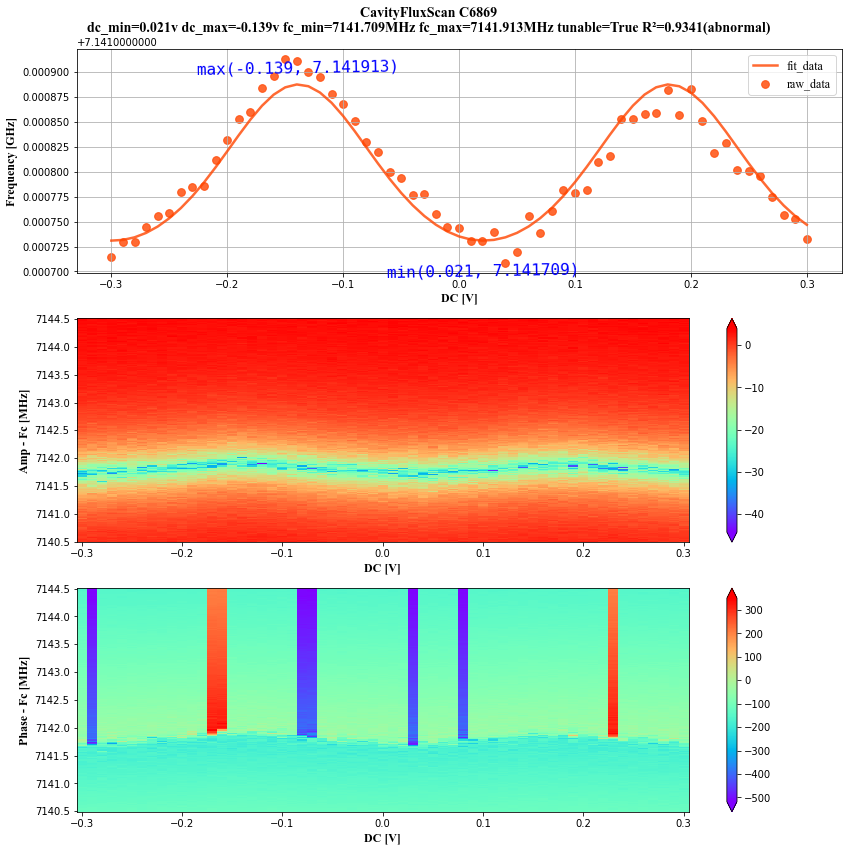

In [42]:
exp.analysis.drawer.figure

In [48]:
pd.DataFrame(exp.analysis.show_results())

,name,value,unit,extra,quality
0,dc_min,-0.075,v,{},None
1,dc_max,0.075,v,{},None
2,fc_min,6533.845,MHz,{},None
3,fc_max,6533.104,MHz,{},None
4,tunable,NaN,None,{},None


In [43]:
coupler.dc_max = exp.analysis.results.dc_max.value
coupler.dc_min = exp.analysis.results.dc_min.value
coupler.tunable = exp.analysis.results.tunable.value
coupler.save_data()

2022-12-12 17:37:26 |  UPDATE  | Save c6869 to data service success.


## IMPA测量

In [21]:
from pyQCat.preliminary import CavityFluxScan

# context.configure_qubits('q65')


IMPA = CavityFluxScan.from_experiment_context(context)

IMPA.set_experiment_options(
    network_analyzer='E5071C',
    net_IFBW=400,
    net_power=-40,
    dc_source='qaio',
    dc_channel=21,
    dc_list=qarange(-0.34, -0.25, 0.002),
    freq_list=np.linspace(6900, 7300, 301).tolist(),
    dynamic_plot=False,
    fine_scan=False,
    scan_name="dc",
#     simulator_data_path='../scripts/simulator/data/CavityFluxScan/dc_qubit_rough/',
)

IMPA.set_analysis_options(
    tackle_type='rough'
)

IMPA.run()

2022-12-15 11:41:15 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CavityFluxScan\Channel21\2022-12-15\11.41.15\


  0%|          | 0/46 [00:00<?, ?it/s]

2022-12-15 11:42:20 |  RESULT  | Experiment results as follow:
| name | describe | value | unit | quality | 
--------------------------------------------


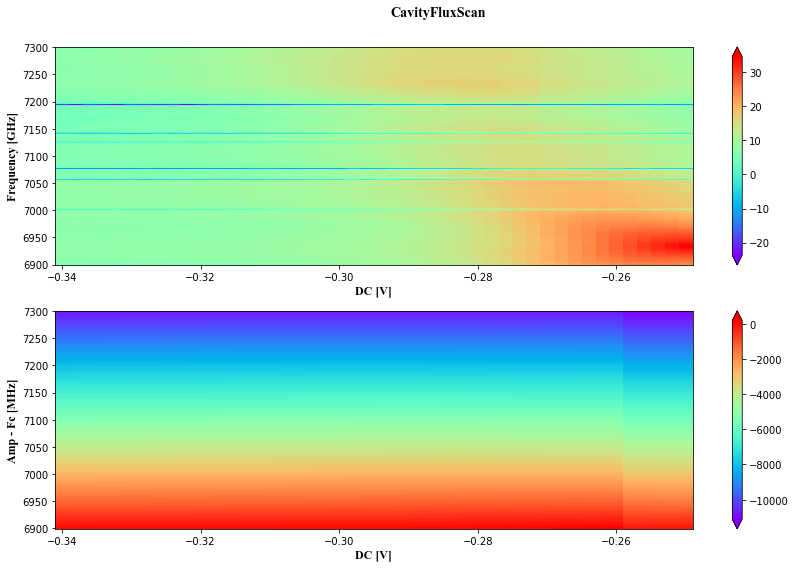

In [22]:
IMPA.analysis.drawer.figure

In [20]:
dc_channel = IMPA.experiment_options.dc_channel


In [20]:
IMPA.dc_source.output_on(21)
IMPA.dc_source.set_dc(21, -0.3)